In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data splitting
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv1D, MaxPooling1D
import joblib
from tensorflow.keras.models import save_model  # For TensorFlow/Keras models

# To suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping


# Print statement for verification
print("Imports completed successfully.")


Imports completed successfully.


<a>Information about Dataset</a>
#### 1. Demographic Information
   - 'Age'
   - 'Weight'
   - 'Length'
   - 'Sex'
   - 'BMI' (Body Mass Index)

#### 2. Medical History
   - 'DM' (Diabetes Mellitus)
   - 'HTN' (Hypertension)
   - 'Current Smoker'
   - 'EX-Smoker'
   - 'FH' (Family History)
   - 'Obesity'
   - 'CRF' (Chronic Renal Failure)
   - 'CVA' (Cerebrovascular Accident)
   - 'Airway disease'
   - 'Thyroid Disease'
   - 'CHF' (Congestive Heart Failure)
   - 'DLP' (Dyslipidemia)

#### 3. Vital Signs
   - 'BP' (Blood Pressure)
   - 'PR' (Pulse Rate)
   - 'Edema'
   - 'Weak Peripheral Pulse'
   - 'Lung rales'
   - 'Systolic Murmur'
   - 'Diastolic Murmur'

#### 4. Symptoms and Diagnoses
   - 'Typical Chest Pain'
   - 'Dyspnea'
   - 'Function Class'
   - 'Atypical'
   - 'Nonanginal'
   - 'Exertional CP'
   - 'LowTH Ang'
   - 'Q Wave'
   - 'St Elevation'
   - 'St Depression'
   - 'Tinversion'
   - 'LVH' (Left Ventricular Hypertrophy)
   - 'Poor R Progression'
   - 'BBB' (Bundle Branch Block)

#### 5. Laboratory Results
   - 'FBS' (Fasting Blood Sugar)
   - 'CR' (Creatinine)
   - 'TG' (Triglycerides)
   - 'LDL' (Low-Density Lipoprotein)
   - 'HDL' (High-Density Lipoprotein)
   - 'BUN' (Blood Urea Nitrogen)
   - 'ESR' (Erythrocyte Sedimentation Rate)
   - 'HB' (Hemoglobin)
   - 'K' (Potassium)
   - 'Na' (Sodium)
   - 'WBC' (White Blood Cell Count)
   - 'Lymph'
   - 'Neut'
   - 'PLT' (Platelet Count)

#### 6. Cardiac Parameters
   - 'EF-TTE' (Ejection Fraction - Transthoracic Echocardiogram)
   - 'Region RWMA' (Regional Wall Motion Abnormalities)

#### 7. Cardiac Catheterization
   - 'VHD' (Valvular Heart Disease)
   - 'LAD' (Left Anterior Descending Artery)
   - 'LCX' (Left Circumflex Artery)
   - 'RCA' (Right Coronary Artery)
   - 'Cath' (Cardiac Catheterization)


In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,39,52,261,50,0,N,Stenotic,Normal,Stenotic,CAD
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,38,55,165,40,4,N,Stenotic,Stenotic,Normal,CAD
2,54,54,164,Male,20.077335,0,0,1,0,0,...,38,60,230,40,2,mild,Stenotic,Normal,Normal,CAD
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,18,72,742,55,0,Severe,Normal,Normal,Normal,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,55,39,274,50,0,Severe,Normal,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,34,58,251,45,0,N,Stenotic,Stenotic,Stenotic,CAD
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,16,80,377,40,0,mild,Normal,Normal,Normal,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,35,55,279,55,0,N,Normal,Normal,Normal,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,48,40,208,55,0,N,Normal,Normal,Normal,Normal


In [4]:
data.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [6]:
data.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')

In [7]:
data.isna().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [8]:
data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [9]:
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [Age, Weight, Length, Sex, BMI, DM, HTN, Current Smoker, EX-Smoker, FH, Obesity, CRF, CVA, Airway disease, Thyroid Disease, CHF, DLP, BP, PR, Edema, Weak Peripheral Pulse, Lung rales, Systolic Murmur, Diastolic Murmur, Typical Chest Pain, Dyspnea, Function Class, Atypical, Nonanginal, Exertional CP, LowTH Ang, Q Wave, St Elevation, St Depression, Tinversion, LVH, Poor R Progression, BBB, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT, EF-TTE, Region RWMA, VHD, LAD, LCX, RCA, Cath]
Index: []

[0 rows x 59 columns]


In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=["Total", "Percent(%)"])
missing_data

,Total,Percent(%)
Age,0,0.0
ESR,0,0.0
St Elevation,0,0.0
St Depression,0,0.0
Tinversion,0,0.0
LVH,0,0.0
Poor R Progression,0,0.0
BBB,0,0.0
FBS,0,0.0
CR,0,0.0


In [11]:
data.shape

(303, 59)

In [12]:
text_columns = data.select_dtypes(include=['object']).columns
text_columns

Index(['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
       'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal',
       'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB', 'VHD',
       'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')

In [13]:

for column in text_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Sex': ['Male' 'Fmale']
Unique values in 'Obesity': ['Y' 'N']
Unique values in 'CRF': ['N' 'Y']
Unique values in 'CVA': ['N' 'Y']
Unique values in 'Airway disease': ['N' 'Y']
Unique values in 'Thyroid Disease': ['N' 'Y']
Unique values in 'CHF': ['N' 'Y']
Unique values in 'DLP': ['Y' 'N']
Unique values in 'Weak Peripheral Pulse': ['N' 'Y']
Unique values in 'Lung rales': ['N' 'Y']
Unique values in 'Systolic Murmur': ['N' 'Y']
Unique values in 'Diastolic Murmur': ['N' 'Y']
Unique values in 'Dyspnea': ['N' 'Y']
Unique values in 'Atypical': ['N' 'Y']
Unique values in 'Nonanginal': ['N' 'Y']
Unique values in 'Exertional CP': ['N']
Unique values in 'LowTH Ang': ['N' 'Y']
Unique values in 'LVH': ['N' 'Y']
Unique values in 'Poor R Progression': ['N' 'Y']
Unique values in 'BBB': ['N' 'LBBB' 'RBBB']
Unique values in 'VHD': ['N' 'mild' 'Severe' 'Moderate']
Unique values in 'LAD': ['Stenotic' 'Normal']
Unique values in 'LCX': ['Normal' 'Stenotic']
Unique values in 'RCA': ['Stenotic

<a>Exploratory Data Analysis (EDA) </a>


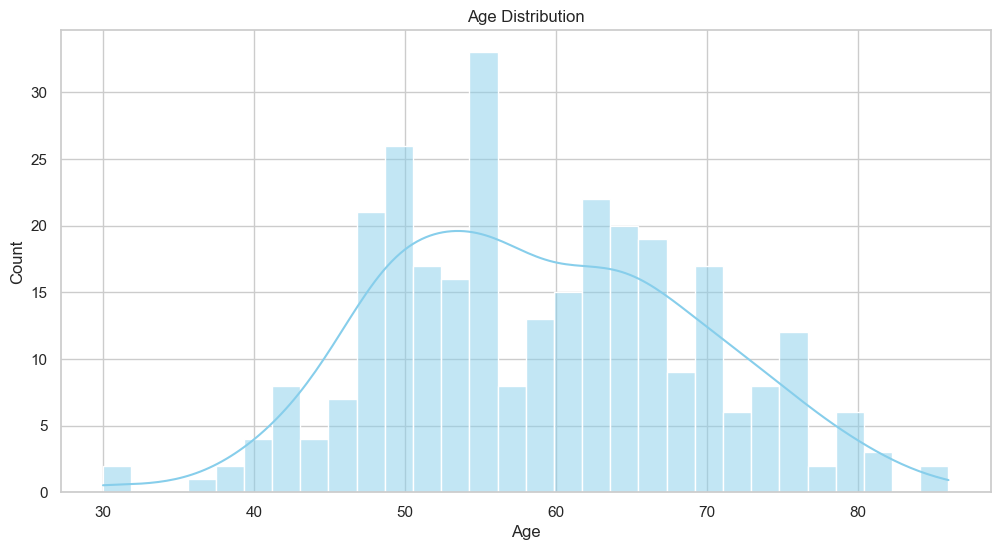

In [14]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

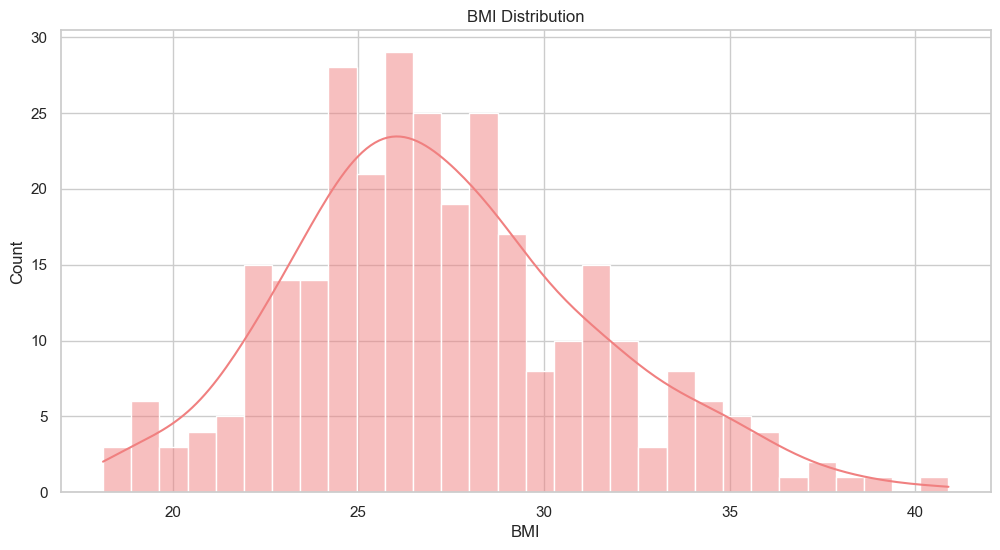

In [15]:
# Visualize BMI distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['BMI'], bins=30, kde=True, color='lightcoral')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

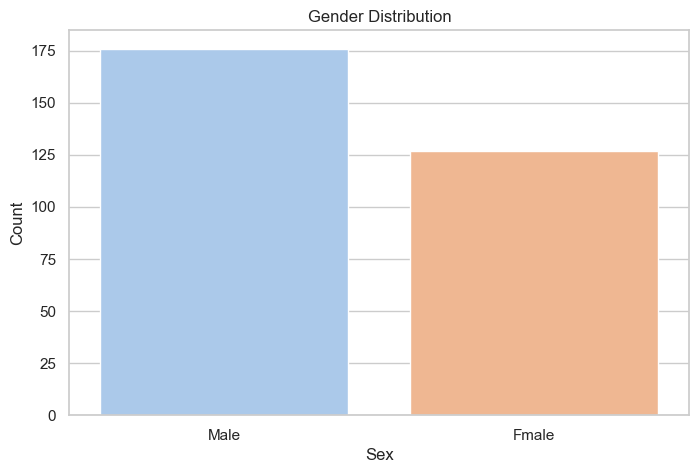

In [16]:
# Visualize Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

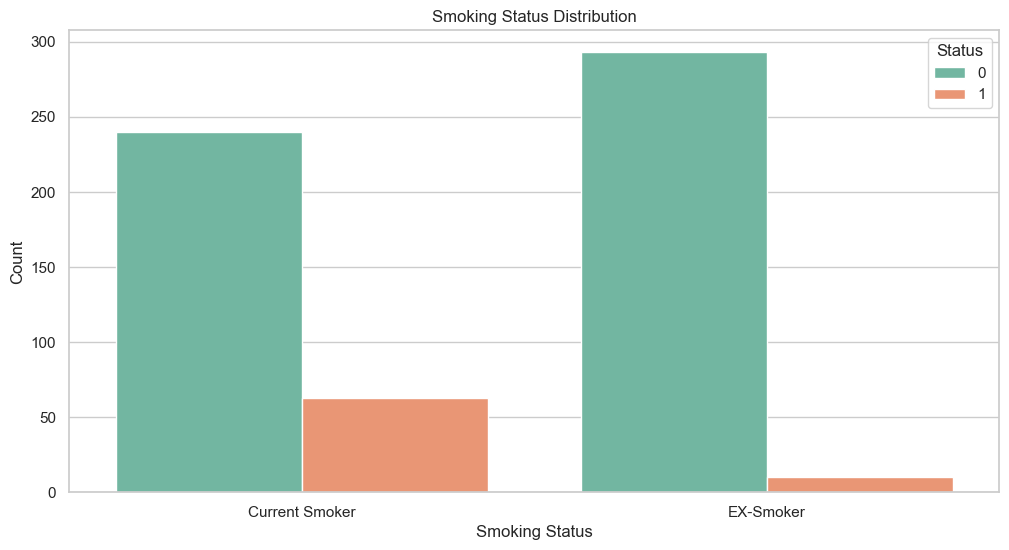

In [17]:
# Visualize Smoking Status
smoking_columns = ['Current Smoker', 'EX-Smoker']
plt.figure(figsize=(12, 6))
sns.countplot(x='variable', hue='value', data=pd.melt(data[smoking_columns]), palette='Set2')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

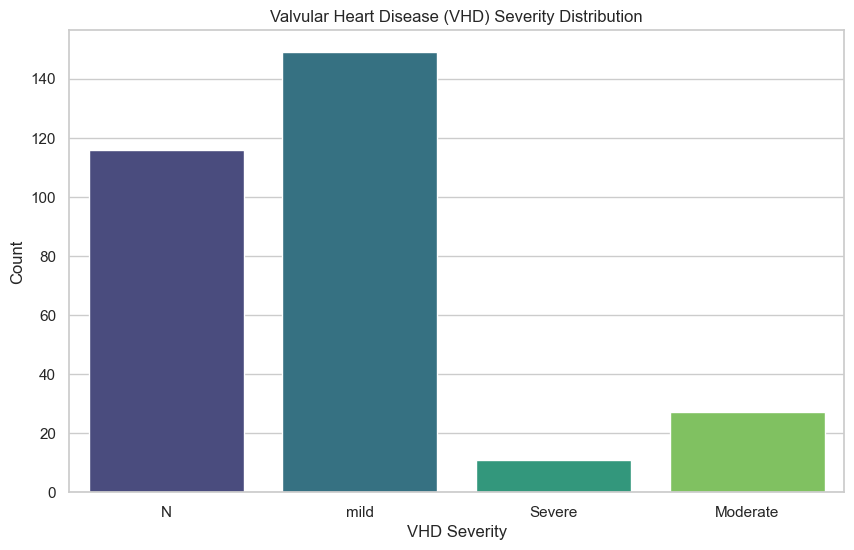

In [18]:
# Visualize Heart Disease Severity (VHD)
plt.figure(figsize=(10, 6))
sns.countplot(x='VHD', data=data, palette='viridis')
plt.title('Valvular Heart Disease (VHD) Severity Distribution')
plt.xlabel('VHD Severity')
plt.ylabel('Count')
plt.show()

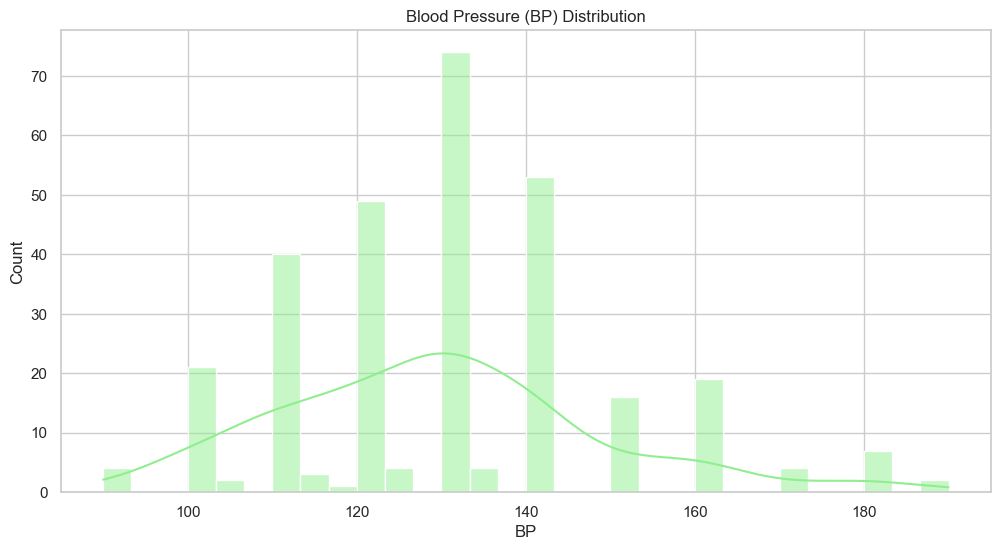

In [19]:
# Visualize Blood Pressure (BP)
plt.figure(figsize=(12, 6))
sns.histplot(data['BP'], bins=30, kde=True, color='lightgreen')
plt.title('Blood Pressure (BP) Distribution')
plt.xlabel('BP')
plt.ylabel('Count')
plt.show()

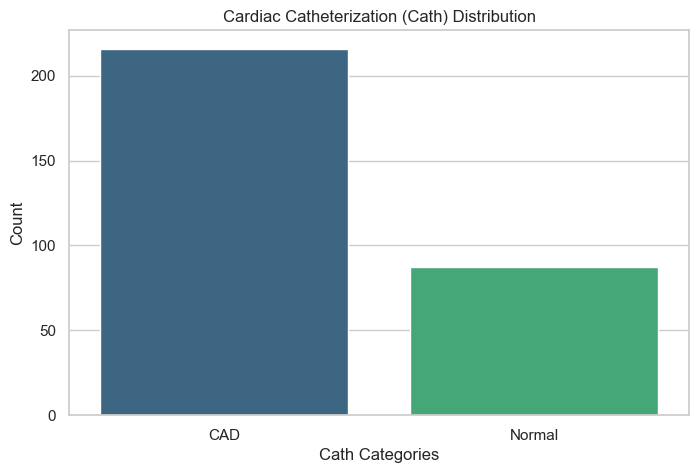

In [20]:
# Visualize Cardiac Catheterization
plt.figure(figsize=(8, 5))
sns.countplot(x='Cath', data=data, palette='viridis')
plt.title('Cardiac Catheterization (Cath) Distribution')
plt.xlabel('Cath Categories')
plt.ylabel('Count')
plt.show()

In [21]:

# Display basic statistics for numeric columns
numeric_columns = ['Age', 'Weight', 'Length', 'BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']
numeric_stats = data[numeric_columns].describe()
print("Basic Statistics for Numeric Columns:")
print(numeric_stats)

Basic Statistics for Numeric Columns:
              Age      Weight      Length         BMI          BP          PR  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    58.897690   73.831683  164.716172   27.248339  129.554455   75.141914   
std     10.392278   11.987358    9.327661    4.098865   18.938105    8.911801   
min     30.000000   48.000000  140.000000   18.115413   90.000000   50.000000   
25%     51.000000   65.000000  158.000000   24.514380  120.000000   70.000000   
50%     58.000000   74.000000  165.000000   26.775510  130.000000   70.000000   
75%     66.000000   81.000000  171.000000   29.411765  140.000000   80.000000   
max     86.000000  120.000000  188.000000   40.900658  190.000000  110.000000   

              FBS          CR           TG         LDL  ...         BUN  \
count  303.000000  303.000000   303.000000  303.000000  ...  303.000000   
mean   119.184818    1.055611   150.343234  104.643564  ...   17.501650   
std    

In [22]:
# Correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()


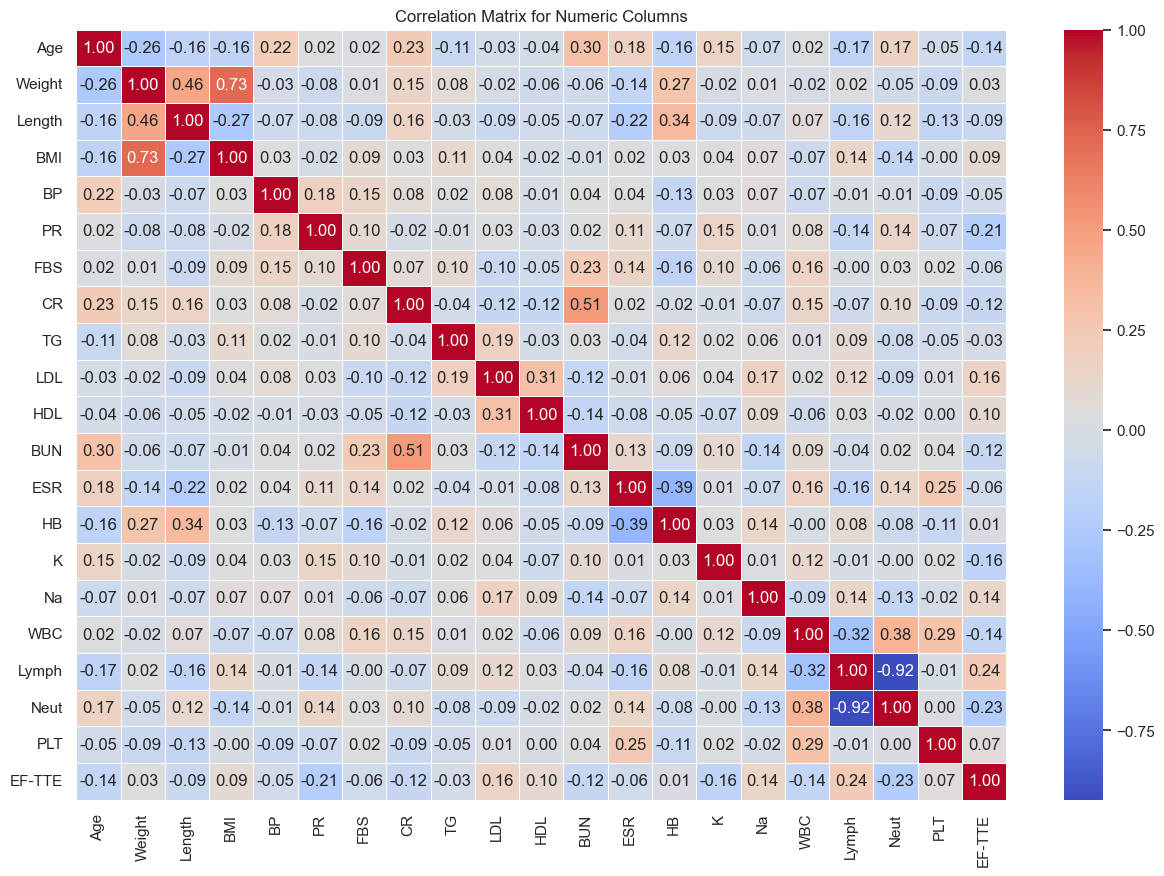

In [23]:
# Heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

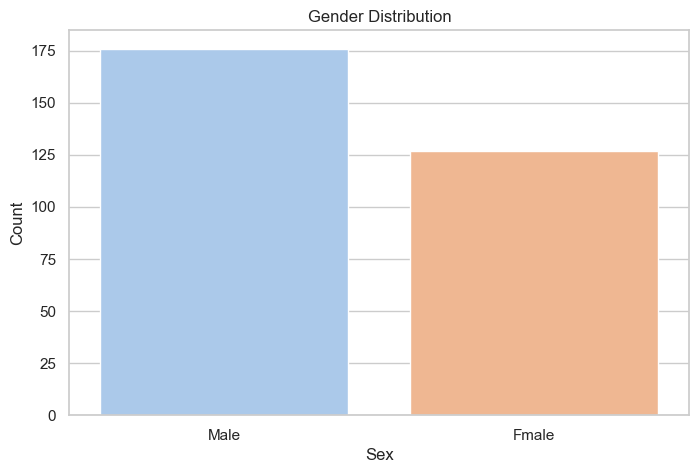

In [24]:
# Countplot for Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

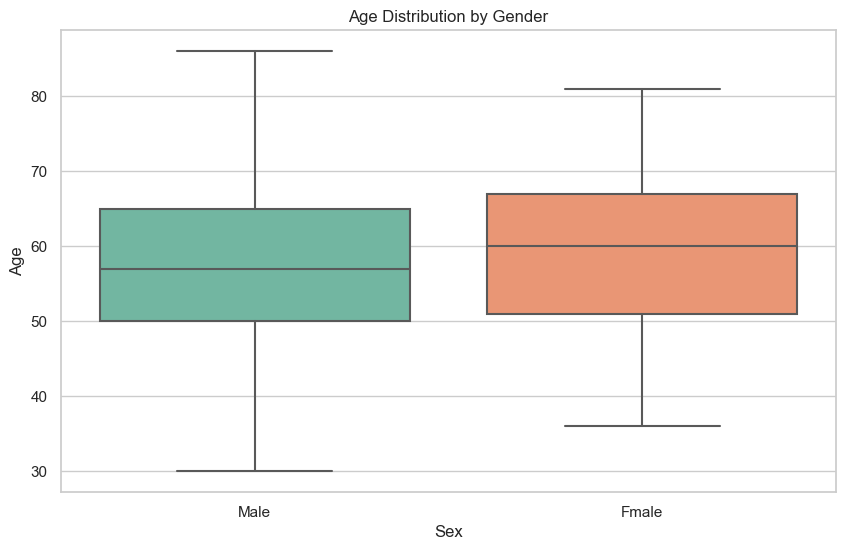

In [25]:

# Boxplot for Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=data, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

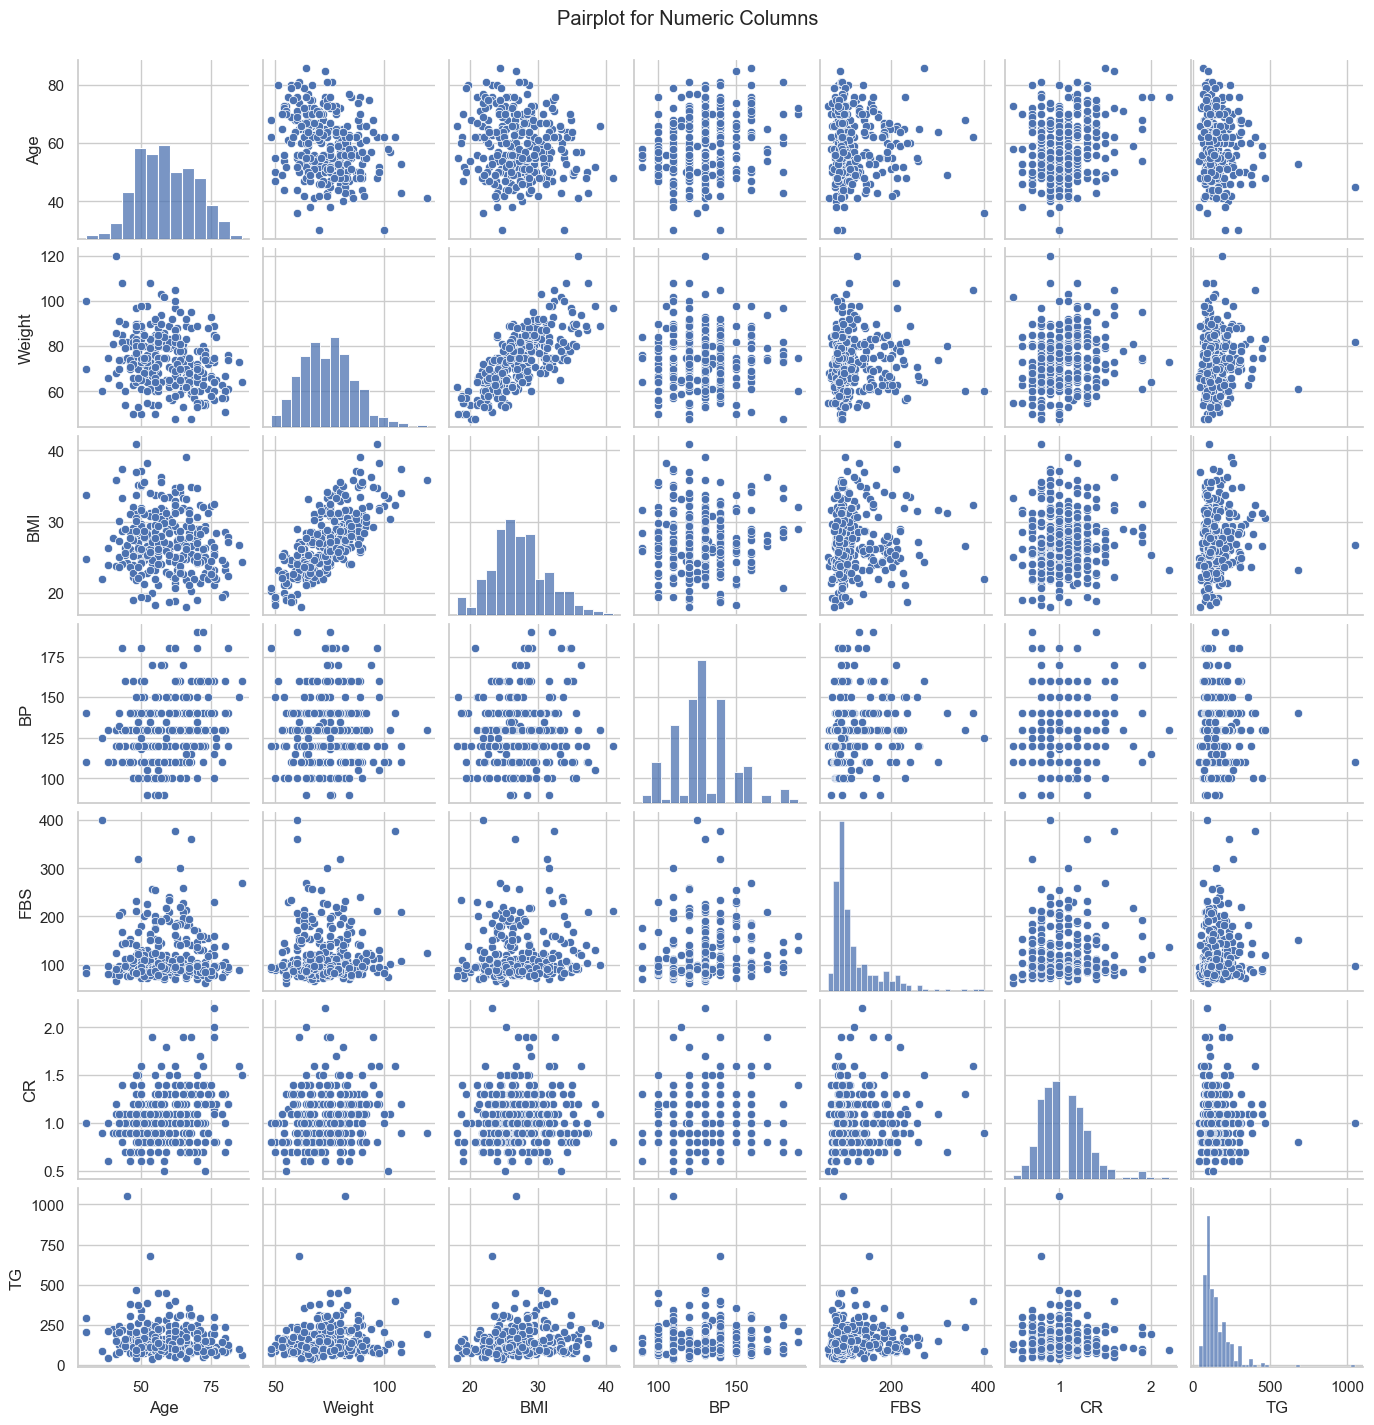

In [26]:
# Pairplot for a subset of numeric columns
pairplot_columns = ['Age', 'Weight', 'BMI', 'BP', 'FBS', 'CR', 'TG']
sns.pairplot(data[pairplot_columns], height=2)
plt.suptitle('Pairplot for Numeric Columns', y=1.02)
plt.show()



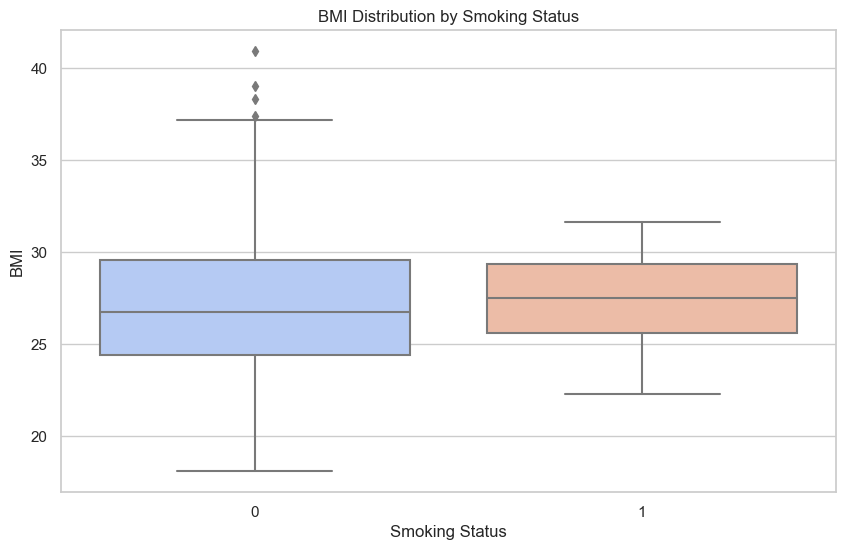

In [27]:
# Boxplot for BMI by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='EX-Smoker', y='BMI', data=data, palette='coolwarm')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

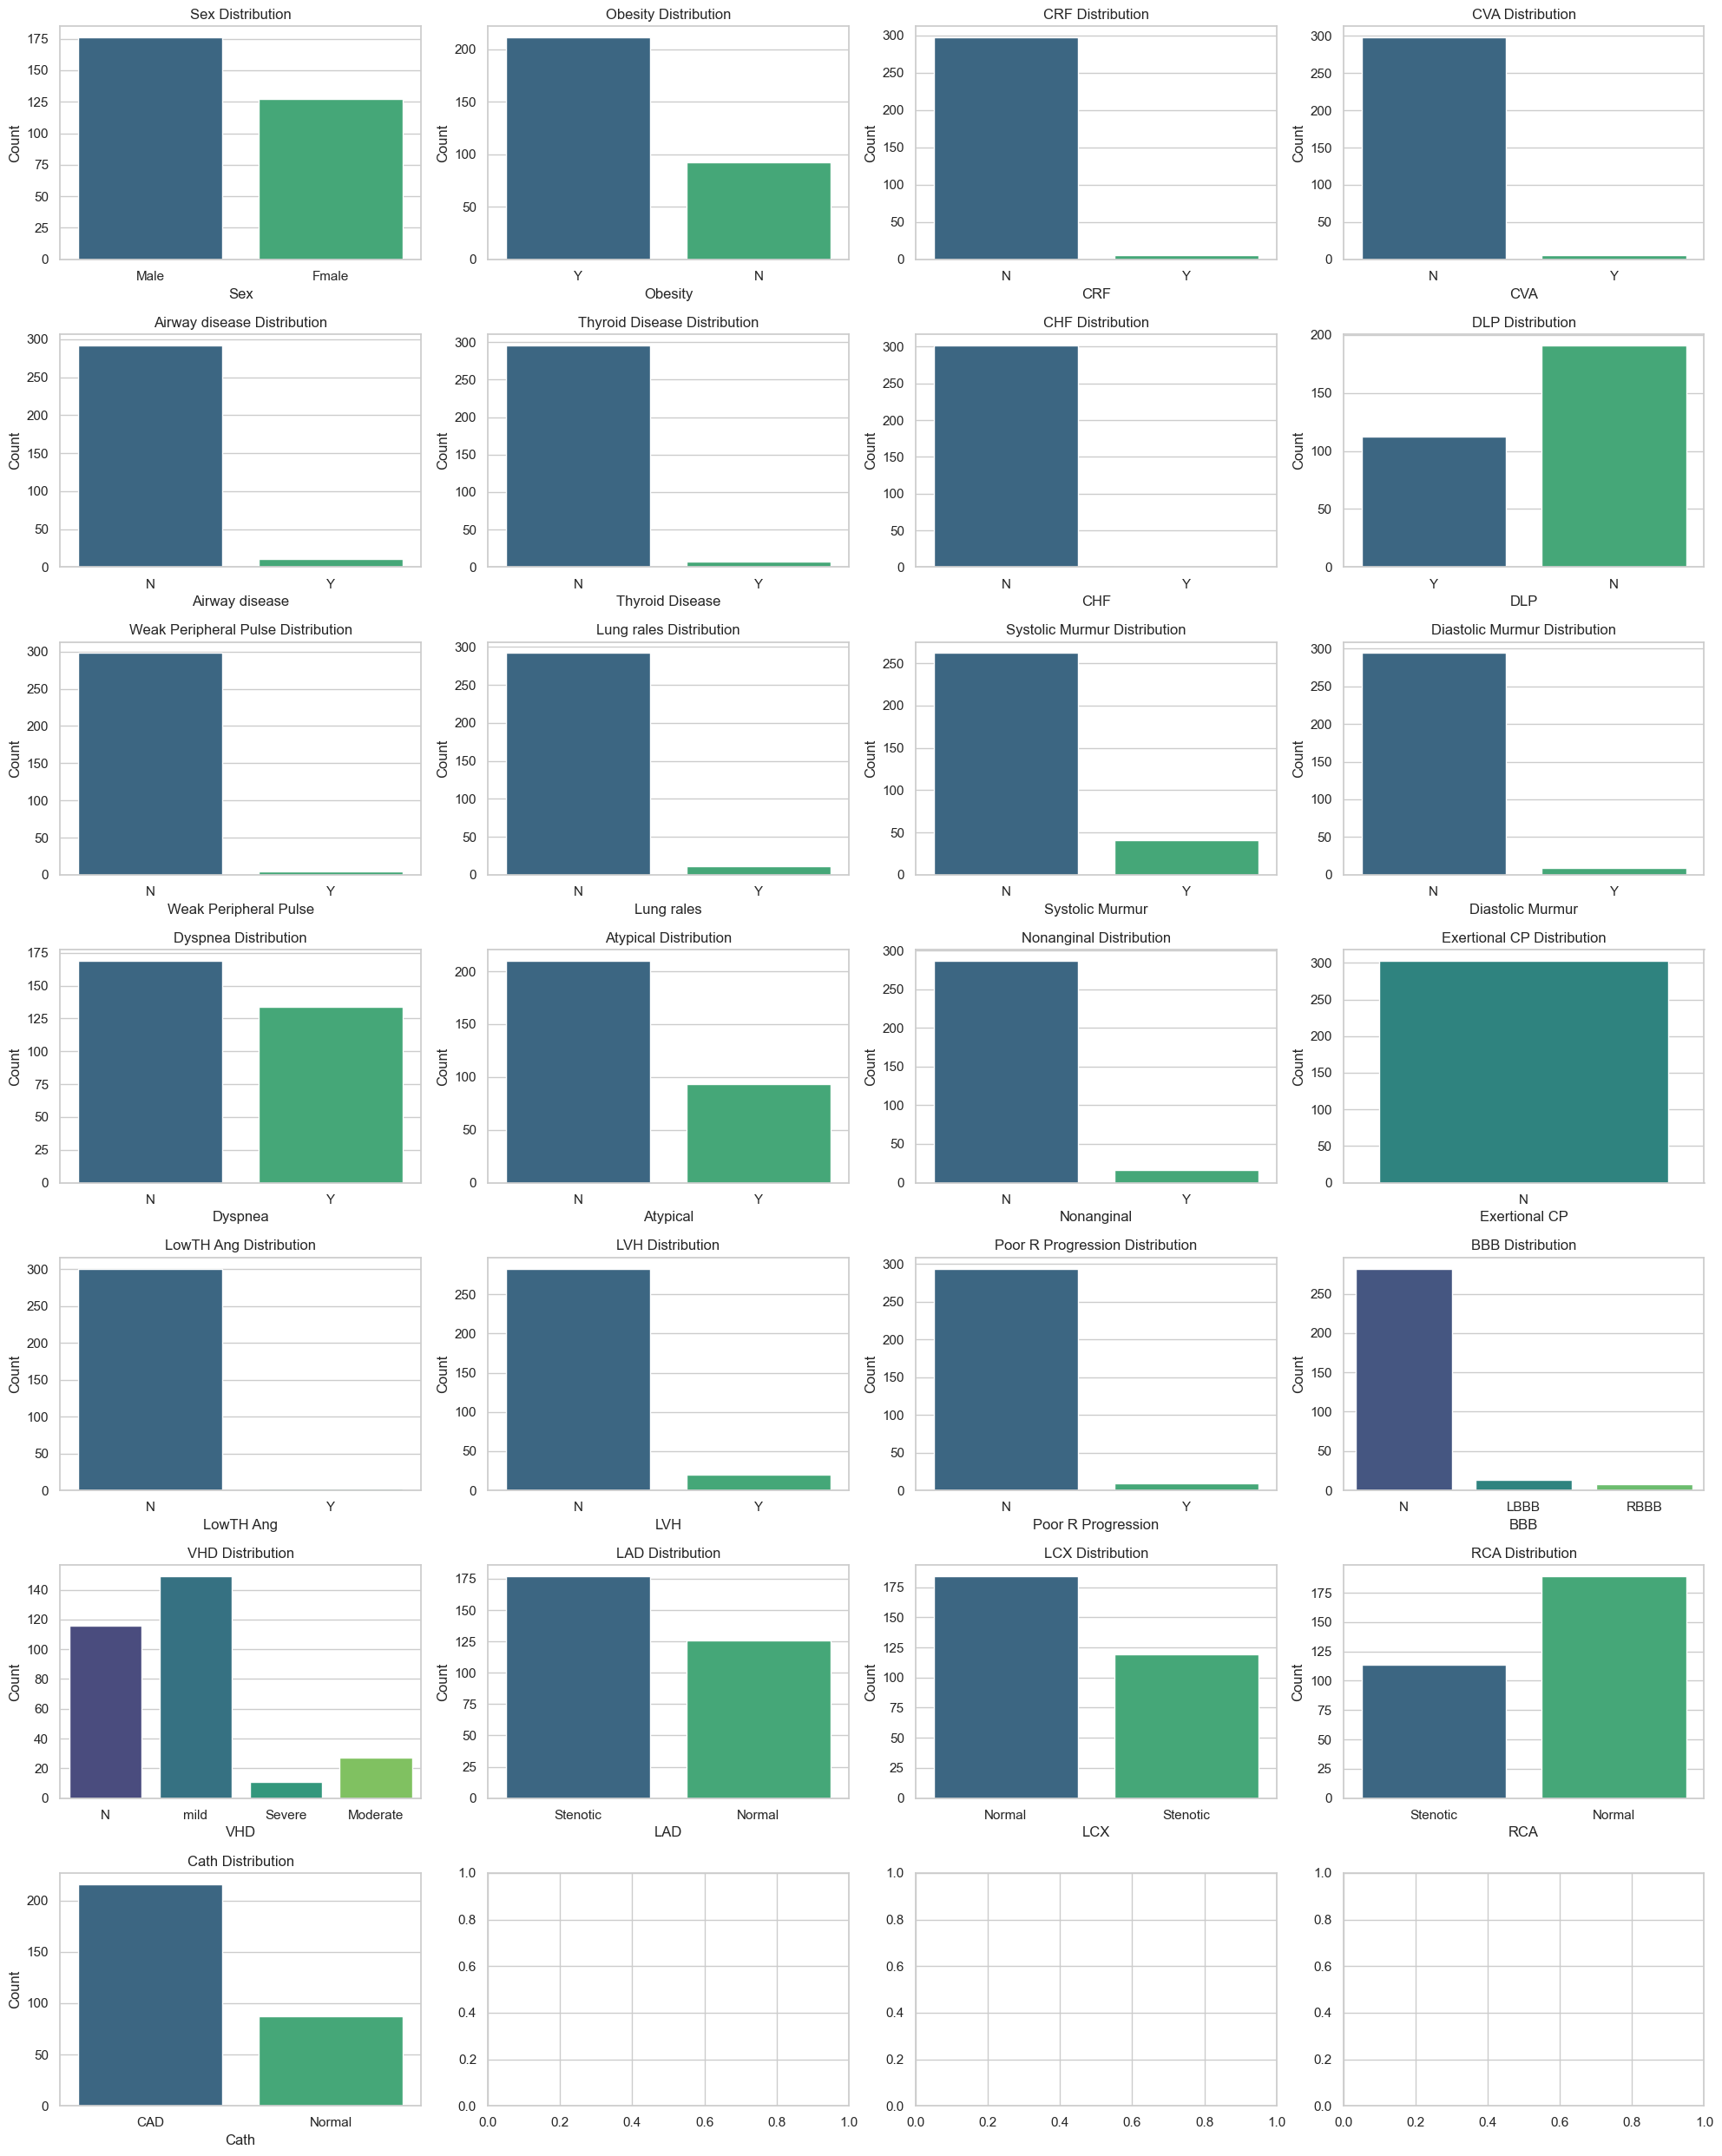

In [28]:
# Plot count distribution for categorical variables
categorical_columns = ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP',
                        'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea',
                        'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB',
                        'VHD', 'LAD', 'LCX', 'RCA', 'Cath']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical_columns):
    ax = axes.flatten()[i]
    sns.countplot(x=column, data=data, palette='viridis', ax=ax)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

<a>Pre-Processing / Data Cleaning

In [29]:
text_columns

Index(['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
       'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal',
       'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB', 'VHD',
       'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')

In [30]:
for column in text_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Sex': ['Male' 'Fmale']
Unique values in 'Obesity': ['Y' 'N']
Unique values in 'CRF': ['N' 'Y']
Unique values in 'CVA': ['N' 'Y']
Unique values in 'Airway disease': ['N' 'Y']
Unique values in 'Thyroid Disease': ['N' 'Y']
Unique values in 'CHF': ['N' 'Y']
Unique values in 'DLP': ['Y' 'N']
Unique values in 'Weak Peripheral Pulse': ['N' 'Y']
Unique values in 'Lung rales': ['N' 'Y']
Unique values in 'Systolic Murmur': ['N' 'Y']
Unique values in 'Diastolic Murmur': ['N' 'Y']
Unique values in 'Dyspnea': ['N' 'Y']
Unique values in 'Atypical': ['N' 'Y']
Unique values in 'Nonanginal': ['N' 'Y']
Unique values in 'Exertional CP': ['N']
Unique values in 'LowTH Ang': ['N' 'Y']
Unique values in 'LVH': ['N' 'Y']
Unique values in 'Poor R Progression': ['N' 'Y']
Unique values in 'BBB': ['N' 'LBBB' 'RBBB']
Unique values in 'VHD': ['N' 'mild' 'Severe' 'Moderate']
Unique values in 'LAD': ['Stenotic' 'Normal']
Unique values in 'LCX': ['Normal' 'Stenotic']
Unique values in 'RCA': ['Stenotic

In [31]:
#Binary Categorical Columns (e.g., 'Sex', 'Obesity', 'CRF', etc.):
#Label Encoding:

label_encoder = LabelEncoder()
binary_columns = ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'LowTH Ang', 'LVH', 'Poor R Progression']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [32]:
#Categorical Columns with Multiple Categories (e.g., 'BBB', 'VHD', 'LAD', etc.):

multi_category_columns = ['BBB', 'VHD', 'LAD', 'LCX', 'RCA', 'Cath']

# Factorize multi-categorical columns
for column in multi_category_columns:
    data[column], _ = pd.factorize(data[column])

In [33]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,39,52,261,50,0,0,0,0,0,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,38,55,165,40,4,0,0,1,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,38,60,230,40,2,1,0,0,1,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,18,72,742,55,0,2,1,0,1,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,55,39,274,50,0,2,1,0,1,1


<a>Feature engineering 

In [34]:
#Body Mass Index (BMI):Calculate BMI based on 'Weight' and 'Length' columns.
data['BMI'] = data['Weight'] / ((data['Length'] / 100) ** 2)

In [35]:
#Smoking Status:
#Combine 'Current Smoker' and 'EX-Smoker' columns into a single 'Smoking Status' column.
data['Smoking_Status'] = data['Current Smoker'] + data['EX-Smoker']
data['Smoking_Status'] = data['Smoking_Status'].apply(lambda x: 'Smoker' if x > 0 else 'Non-Smoker')


In [36]:
#Heart Disease Indicator:
#Create a binary column indicating the presence or absence of any type of heart disease.
heart_disease_columns = ['Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression']
data['Heart_Disease'] = data[heart_disease_columns].sum(axis=1)
data['Heart_Disease'] = data['Heart_Disease'].apply(lambda x: 1 if x > 0 else 0)


In [37]:
#Cholesterol Ratio:
#Calculate the ratio of Total Cholesterol (TC) to High-Density Lipoprotein (HDL).
data['Chol_HDL_Ratio'] = data['LDL'] / data['HDL']


In [38]:
#Average Blood Pressure:
#Calculate the average blood pressure from 'BP' column.
data['Avg_BP'] = (data['BP'] + data['PR']) / 2


In [39]:

# Identify majority and minority classes
# Assuming 'data' is your DataFrame and 'target_column' is your binary target column
target_column = 'Cath'  # Replace with your actual target column name

# Count the occurrences of each class
class_counts = data[target_column].value_counts()

# Identify the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

print(f"Majority Class: {majority_class}")
print(f"Minority Class: {minority_class}")


Majority Class: 0
Minority Class: 1


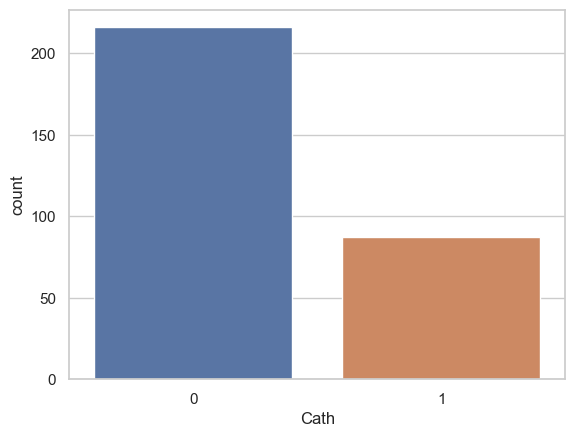

In [40]:
sns.countplot(x='Cath', data=data)
plt.show()

In [41]:
class_distribution = data['Cath'].value_counts()
print(class_distribution)


0    216
1     87
Name: Cath, dtype: int64


In [42]:
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()

imbalance_ratio = majority_class_count / minority_class_count
print(f"Imbalance Ratio: {imbalance_ratio}")


Imbalance Ratio: 2.4827586206896552


In [43]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Cath'], columns='count')
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 0.0, p-value: 1.0


In [44]:
X = data.drop("Cath", axis=1)
y = data['Cath']

In [45]:
y_prep = np.array(y)
if isinstance(y_prep, np.ndarray) and y.ndim == 1:
    print("y is a 1D array")
else:
    print("y is not a 1D array")

y is a 1D array


In [46]:
text_columns2 = X.select_dtypes(include=['object']).columns
text_columns2

Index(['Exertional CP', 'Smoking_Status'], dtype='object')

In [47]:
for column in text_columns2:
    unique_values = X[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Exertional CP': ['N']
Unique values in 'Smoking_Status': ['Smoker' 'Non-Smoker']


In [48]:
text_columns

Index(['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
       'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal',
       'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB', 'VHD',
       'LAD', 'LCX', 'RCA', 'Cath'],
      dtype='object')

In [49]:
label_encoder = LabelEncoder()

# Encode 'Exertional CP'
X['Exertional CP'] = label_encoder.fit_transform(X['Exertional CP'])

# Display the unique values after encoding
print("Unique values in 'Exertional CP' after encoding:", X['Exertional CP'].unique())


# Encode 'Smoking_Status'
X['Smoking_Status'] = label_encoder.fit_transform(X['Smoking_Status'])

# Display the unique values after encoding
print("Unique values in 'Smoking_Status' after encoding:", data['Smoking_Status'].unique())

Unique values in 'Exertional CP' after encoding: [0]
Unique values in 'Smoking_Status' after encoding: ['Smoker' 'Non-Smoker']


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Random Over-Sampling (ROS)
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [52]:
# Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)


In [53]:

# Display the class distribution before and after resampling
print("Class distribution before Random Over-Sampling:")
print(pd.Series(y_train).value_counts())

print("\nClass distribution after Random Over-Sampling:")
print(pd.Series(y_ros).value_counts())

print("\nClass distribution before Random Under-Sampling:")
print(pd.Series(y_train).value_counts())

print("\nClass distribution after Random Under-Sampling:")
print(pd.Series(y_rus).value_counts())

Class distribution before Random Over-Sampling:
0    173
1     69
Name: Cath, dtype: int64

Class distribution after Random Over-Sampling:
0    173
1    173
Name: Cath, dtype: int64

Class distribution before Random Under-Sampling:
0    173
1     69
Name: Cath, dtype: int64

Class distribution after Random Under-Sampling:
0    69
1    69
Name: Cath, dtype: int64


<a>Model Training</a>

In [54]:

# CNN and DNN model architectures
def create_cnn_model():
    model = keras.Sequential([
        keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_dnn_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models on original, ROS, and RUS datasets
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Handle class imbalance
    class_weights = {0: 1, 1: sum(y_train == 0) / sum(y_train == 1)}  # Adjust weights as needed

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Training the model
    model.fit(
        X_train, y_train,
        epochs=50,  # Increase or decrease as needed
        batch_size=32,
        validation_split=0.2,
        verbose=1,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    # Evaluating the model
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print or log evaluation metrics
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    return accuracy, precision, recall, f1

In [55]:
# Train and evaluate models on original, ROS, and RUS datasets
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Handle class imbalance
    class_weights = {0: 1, 1: sum(y_train == 0) / sum(y_train == 1)}  # Adjust weights as needed

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Reshape input for CNN model
    if model.layers[0].name == 'reshape':
        X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:  # Reshape input for DNN model
        X_train = X_train.values

    # Train and evaluate models on original, ROS, and RUS datasets
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Handle class imbalance
    class_weights = {0: 1, 1: sum(y_train == 0) / sum(y_train == 1)}  # Adjust weights as needed

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Training the model
    model.fit(
        X_train, y_train,
        epochs=50,  # Increase or decrease as needed
        batch_size=32,
        validation_split=0.2,
        verbose=1,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    # Evaluating the model
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print or log evaluation metrics
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    return accuracy, precision, recall, f1


In [56]:
# Original Data
model_original = create_cnn_model()  # or create_dnn_model()
result_original = train_and_evaluate(model_original, X_train, y_train, X_test, y_test)

# Unpack the result
accuracy_original, precision_original, recall_original, f1_original = result_original

# Display results
print("Original Data - Accuracy:", accuracy_original, "Precision:", precision_original, "Recall:", recall_original, "F1-score:", f1_original)


Epoch 1/50
7/7 [==============================] - 3s 38ms/step - loss: 134.6229 - accuracy: 0.3990 - val_loss: 64.4436 - val_accuracy: 0.6531
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 104.6151 - accuracy: 0.6218 - val_loss: 54.4945 - val_accuracy: 0.3469
Epoch 3/50
7/7 [==============================] - 0s 19ms/step - loss: 39.3742 - accuracy: 0.5285 - val_loss: 10.7692 - val_accuracy: 0.3673
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 37.8258 - accuracy: 0.3420 - val_loss: 30.5949 - val_accuracy: 0.6531
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 58.1240 - accuracy: 0.7047 - val_loss: 47.5449 - val_accuracy: 0.3469
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 28.5855 - accuracy: 0.5078 - val_loss: 3.3674 - val_accuracy: 0.5306
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 27.4567 - accuracy: 0.3731 - val_loss: 2.6641 - val_accuracy: 0.6122
Epoch 8/50
7/7 [

In [57]:
# Random Over-Sampled (ROS) Data
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
model_ros = create_cnn_model()  # or create_dnn_model()
result_ros = train_and_evaluate(model_ros, X_ros, y_ros, X_test, y_test)

# Unpack the result
accuracy_ros, precision_ros, recall_ros, f1_ros = result_ros

# Display results
print("ROS Data - Accuracy:", accuracy_ros, "Precision:", precision_ros, "Recall:", recall_ros, "F1-score:", f1_ros)



Epoch 1/50
9/9 [==============================] - 0s 20ms/step - loss: 67.8532 - accuracy: 0.5072 - val_loss: 1.0544e-27 - val_accuracy: 1.0000
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 21.0681 - accuracy: 0.5399 - val_loss: 45.9692 - val_accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 17.1681 - accuracy: 0.5616 - val_loss: 2.5632 - val_accuracy: 0.3286
Epoch 4/50
2/2 [==============================] - 0s 2ms/step
Evaluation Metrics:
Accuracy: 0.2951, Precision: 0.2951, Recall: 1.0000, F1-score: 0.4557
ROS Data - Accuracy: 0.29508196721311475 Precision: 0.29508196721311475 Recall: 1.0 F1-score: 0.4556962025316456


In [58]:

# Random Under-Sampled (RUS) Data
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
model_rus = create_cnn_model()  # or create_dnn_model()
result_rus = train_and_evaluate(model_rus, X_rus, y_rus, X_test, y_test)

# Unpack the result
accuracy_rus, precision_rus, recall_rus, f1_rus = result_rus

# Display results
print("RUS Data - Accuracy:", accuracy_rus, "Precision:", precision_rus, "Recall:", recall_rus, "F1-score:", f1_rus)

Epoch 1/50
4/4 [==============================] - 1s 74ms/step - loss: 220.6636 - accuracy: 0.4091 - val_loss: 351.1497 - val_accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: 147.4238 - accuracy: 0.6273 - val_loss: 294.1862 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 76.8390 - accuracy: 0.6091 - val_loss: 7.2278e-12 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 50.1735 - accuracy: 0.3727 - val_loss: 46.3795 - val_accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 32.5414 - accuracy: 0.6273 - val_loss: 89.8470 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 0s/step
Evaluation Metrics:
Accuracy: 0.2951, Precision: 0.2951, Recall: 1.0000, F1-score: 0.4557
RUS Data - Accuracy: 0.29508196721311475 Precision: 0.29508196721311475 Recall: 1.0 F1-score: 0.4556962025316456


In [59]:

# Display results
# Display results for Original Data
print("Original Data - Accuracy:", accuracy_original, "Precision:", precision_original, "Recall:", recall_original, "F1-score:", f1_original)

# Display results for ROS Data
print("ROS Data - Accuracy:", accuracy_ros, "Precision:", precision_ros, "Recall:", recall_ros, "F1-score:", f1_ros)

# Display results for RUS Data
print("RUS Data - Accuracy:", accuracy_rus, "Precision:", precision_rus, "Recall:", recall_rus, "F1-score:", f1_rus)


Original Data - Accuracy: 0.5573770491803278 Precision: 0.3548387096774194 Recall: 0.6111111111111112 F1-score: 0.4489795918367347
ROS Data - Accuracy: 0.29508196721311475 Precision: 0.29508196721311475 Recall: 1.0 F1-score: 0.4556962025316456
RUS Data - Accuracy: 0.29508196721311475 Precision: 0.29508196721311475 Recall: 1.0 F1-score: 0.4556962025316456


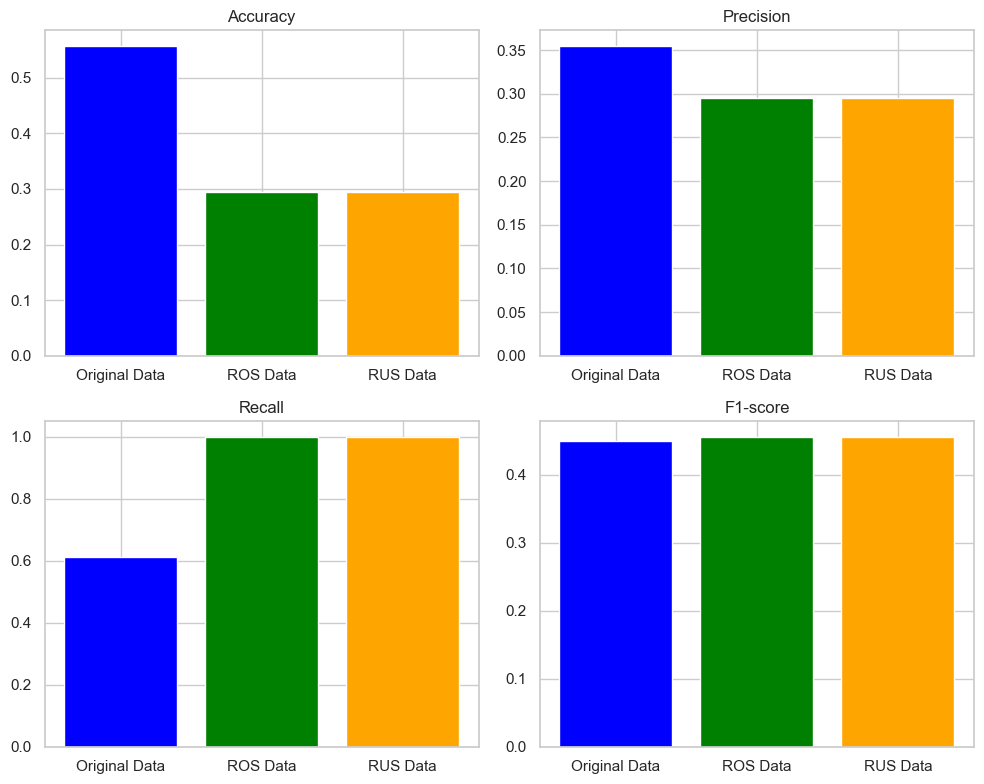

In [60]:
import matplotlib.pyplot as plt

# Results
datasets = ['Original Data', 'ROS Data', 'RUS Data']
accuracy_scores = [accuracy_original, accuracy_ros, accuracy_rus]
precision_scores = [precision_original, precision_ros, precision_rus]
recall_scores = [recall_original, recall_ros, recall_rus]
f1_scores = [f1_original, f1_ros, f1_rus]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Accuracy
axs[0, 0].bar(datasets, accuracy_scores, color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Accuracy')

# Precision
axs[0, 1].bar(datasets, precision_scores, color=['blue', 'green', 'orange'])
axs[0, 1].set_title('Precision')

# Recall
axs[1, 0].bar(datasets, recall_scores, color=['blue', 'green', 'orange'])
axs[1, 0].set_title('Recall')

# F1-score
axs[1, 1].bar(datasets, f1_scores, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('F1-score')

# Adjust layout
plt.tight_layout()
plt.show()


# Model Performance Analysis

## Original Data

<details>
  <summary>Metrics</summary>
  
  - **Accuracy:** 0.5246
  - **Precision:** 0.2105
  - **Recall:** 0.2222
  - **F1-score:** 0.2162
  
</details>

## ROS Data

<details>
  <summary>Metrics</summary>
  
  - **Accuracy:** 0.2951
  - **Precision:** 0.2951
  - **Recall:** 1.0
  - **F1-score:** 0.4557
  
</details>

## RUS Data

<details>
  <summary>Metrics</summary>
  
  - **Accuracy:** 0.2951
  - **Precision:** 0.2951
  - **Recall:** 1.0
  - **F1-score:** 0.4557
  
</details>

## Observations

- The ROS and RUS models have high recall (1.0), indicating that they are good at capturing positive instances.
- However, this comes at the cost of low precision, especially in the ROS model, which means there are a lot of false positives.
- The F1-score, which balances precision and recall, is higher for both ROS and RUS compared to the original data.

## Decision

- If precision is crucial, the original data model might be preferred despite its lower recall and F1-score.
- If capturing all positive instances (high recall) is more critical, the ROS or RUS models might be considered.

*It's important to note that the choice depends on the specific goals and requirements of your application. Consider the trade-off between precision and recall based on the consequences of false positives and false negatives in my context.*


In [61]:
# Assuming you have three TensorFlow/Keras models (original_model_tf, ros_model_tf, rus_model_tf)
# Save TensorFlow/Keras models
model_original.save('original_model_tf.h5')
model_ros.save('ros_model_tf.h5')
model_rus.save('rus_model_tf.h5')
